In [4]:
import threading
import time
from rich.console import Console
from rich.logging import RichHandler
import logging
import websocket

import requests
import websocket
import json
import time
import os
from dotenv import load_dotenv
from urllib.parse import urlencode
import hmac
import hashlib
import copy

In [2]:
real_time_prices = []

def run_websocket():
    global real_time_prices
    def on_message(ws, message):
        global real_time_prices
        message_ = json.loads(message)
        real_time_prices.append({"t": message_['T'], "p":message_['p']})


    ws = websocket.WebSocketApp("wss://fstream.binance.com/ws/1000pepeusdc@aggTrade", on_message=on_message)

    ws.run_forever()


In [3]:
websocket_thread = threading.Thread(target=run_websocket)
websocket_thread.start()


In [88]:
prices = copy.deepcopy(real_time_prices)

In [89]:
len(prices)

2223

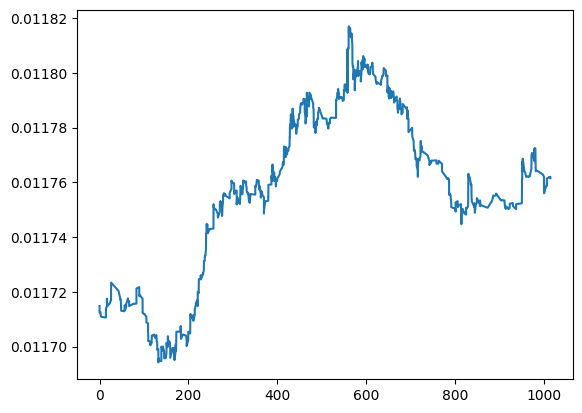

In [90]:
from matplotlib import pyplot as plt
import numpy as np
plt.plot([(float(x['t']) - float(prices[0]['t']))* 10**(-3) for x in prices], [float(x['p']) for x in prices])

In [91]:
prices_list = [float(x['p']) for x in prices]
time_list= [(float(x['t']) - float(prices[0]['t']))* 10**(-3) for x in prices]


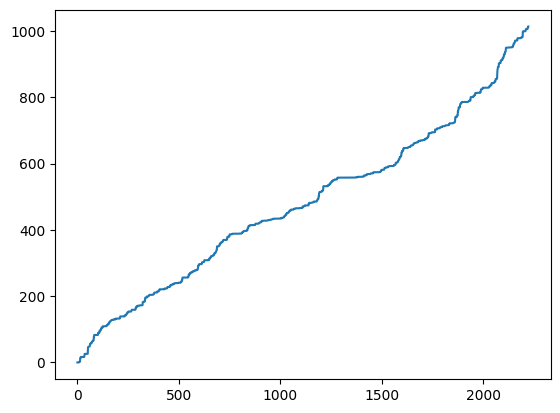

In [113]:
plt.plot(time_list)

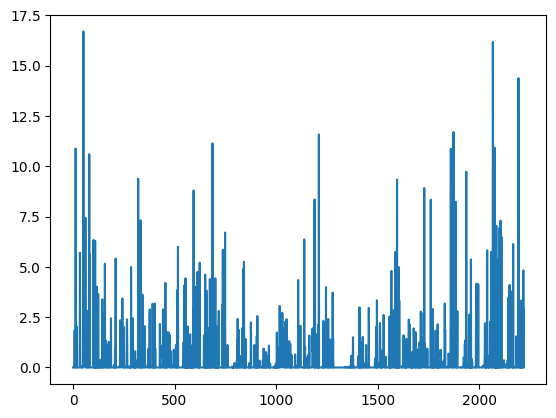

In [92]:
plt.plot([(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))])

(array([1.545e+03, 9.100e+01, 6.900e+01, 3.300e+01, 2.900e+01, 2.200e+01,
        1.200e+01, 2.600e+01, 2.000e+01, 1.200e+01, 8.000e+00, 1.300e+01,
        8.000e+00, 9.000e+00, 9.000e+00, 1.200e+01, 1.400e+01, 5.000e+00,
        1.000e+01, 6.000e+00, 5.000e+00, 9.000e+00, 8.000e+00, 7.000e+00,
        7.000e+00, 3.000e+00, 9.000e+00, 5.000e+00, 6.000e+00, 4.000e+00,
        4.000e+00, 6.000e+00, 6.000e+00, 6.000e+00, 3.000e+00, 6.000e+00,
        1.000e+00, 5.000e+00, 5.000e+00, 5.000e+00, 4.000e+00, 5.000e+00,
        3.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 3.000e+00,
        6.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 7.000e+00, 1.000e+00,
        4.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 3.000e+0

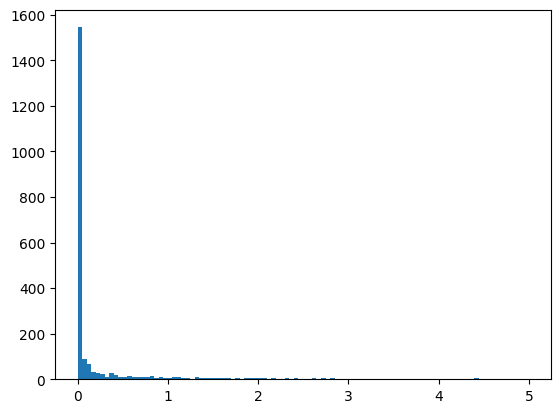

In [93]:
plt.hist(  [num for num in  [(time_list[i] - time_list[i - 1]) for i in range(1, len(time_list))] if num < 5] , bins=100)


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   1.,   3.,   1.,   4.,   0.,   2.,   2.,   5.,
          3.,   3.,   5.,  13.,  10.,  18.,  10.,  23.,  14.,  32.,  24.,
         70.,  43., 142., 130., 456., 474., 176., 181.,  65.,  75.,  34.,
         46.,  19.,  32.,   6.,  31.,   9.,  11.,   4.,   7.,   1.,  11.,
          6.,   6.,   2.,   3.,   1.,   2.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-6.35571676e-04, -6.22686551e-04, -6.09801426e-04, -5.96916302e-04,
        -5.84031177e-04, -5.71146053e-04, -5.58260928e-04, -5.45375804e-04,
        -5.32490679e-04, -5.19605555e-04, -5.06720430e-04, -4.93835306e-04,
        -4.80950181e-04, -4.68065057e-04, -4.55179932e-04, -4.42294808e-04,
        -4.294

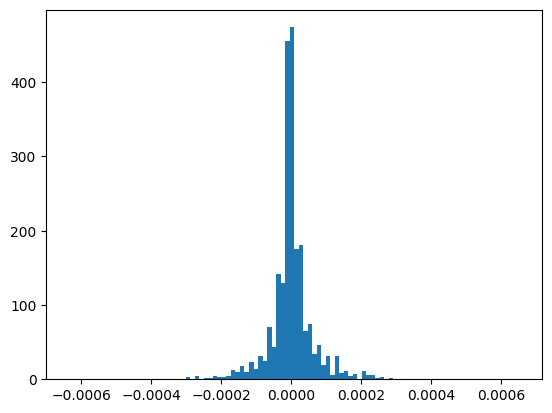

In [96]:
plt.hist([(prices_list[i] / prices_list[i - 1] - 1) for i in range(1, len(prices_list))], bins=100)

In [97]:
data = [[(float(x['t']) - float(prices[0]['t'])) * 10**(-3) , float(x['p'])]for x in prices]

In [100]:
# 计算价格变化达到2%所需的时间
result = []

# 遍历每个时间点
for i in range(len(data)):
    start_time, start_price = data[i]
    found = False
    
    # 遍历后续时间点
    for j in range(i + 1, len(data)):
        current_time, current_price = data[j]
        
        # 计算价格变化百分比
        price_change = (current_price - start_price) / start_price
        
        # 检查价格变化是否达到2%
        if abs(price_change) >= 0.003:
            time_diff = current_time - start_time
            result.append([start_time, start_price, time_diff])
            found = True
            break
    
    # 如果在后续时间点中没有找到达到2%的变化
    if not found:
        result.append([start_time, start_price, None])


(array([469.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,  27.,  13.,
         18.,  25.,  16.,   9.,  16.,   8.,  31.,  16.,  35.,  35.,   9.,
         20.,   8.,   9.,  21.,  33.,  20.,  26.,  25.,  45.,  73.,  26.,
         63.,  83.,  46.,  70.,  76.,  42.,  32.,  50.,  49.,  23.,   9.,
         62.,  45.,  19.,  18.,  33.,  18.,  12.,   7.,   7.,  13.,   6.,
         15.,   0.,   7.,  11.,  26.,  15.,  10.,  21.,  14.,   7.,  18.,
         29.,  11.,   1.,   0.,  10.,   0.,   0.,   5.,   0.,   0.,   2.,
          9.,   0.,   1.,   7.,  21.,   4.,  18.,  15.,  15.,  13.,  15.,
          8.,   0.,   6.,   8.,   9.,   0.,   0.,  18.,   2.,   2.,  14.,
         19.]),
 array([ -1.     ,   2.84986,   6.69972,  10.54958,  14.39944,  18.2493 ,
         22.09916,  25.94902,  29.79888,  33.64874,  37.4986 ,  41.34846,
         45.19832,  49.04818,  52.89804,  56.7479 ,  60.59776,  64.44762,
         68.29748,  72.14734,  75.9972 ,  79.84706,  83.69692,  87.54678,
         91.39664,  95

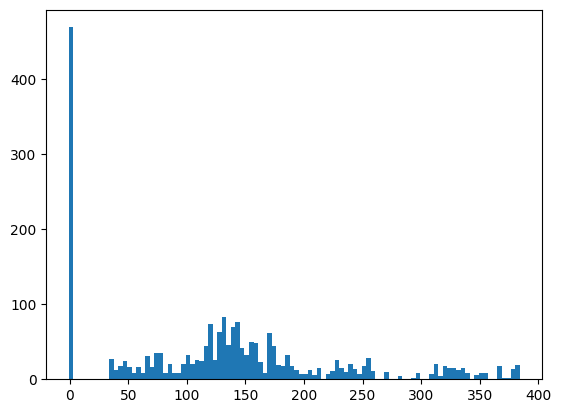

In [101]:
plt.hist([-1 if x is None else x for x in np.array(result)[:,-1]], bins=100)

In [102]:
price_list = prices_list

In [103]:
result = []


# 遍历每个价格
for i in range(len(prices)):
    start_time = float(prices[i]['t'])
    start_price = float(prices[i]['p'])
    trend_up = None
    step_count = 0
    total_percentage_change = 0
    duration = 0  # 初始化持续时间
    
    # 遍历后续价格
    for j in range(i + 1, len(prices)):
        current_time = float(prices[j]['t'])
        current_price = float(prices[j]['p'])
        percentage_change = (current_price - start_price) / start_price
        
        # 如果趋势未定义，定义初始趋势
        if trend_up is None:
            trend_up = percentage_change > 0
        
        # 检查趋势是否反转
        if (percentage_change > 0 and trend_up) or (percentage_change < 0 and not trend_up):
            step_count += 1
            duration = current_time - start_time  # 计算持续时间
            total_percentage_change = (current_price - start_price) / start_price * 100
        else:
            break
    
    result.append([start_time, start_price, step_count, duration * 10**(-3), total_percentage_change])


In [104]:
np.mean(np.array(result)[:, -1])

0.009719610812517925

(array([  3.,   5.,   1.,   0.,   1.,   4.,   3.,   1.,   1.,   1.,   2.,
          1.,   1.,   1.,   2.,   2.,   3.,   2.,   2.,   2.,   3.,   3.,
          2.,   1.,   1.,   0.,   2.,   1.,   5.,   3.,   2.,   5.,   2.,
          2.,   0.,   2.,   3.,   0.,   2.,   2.,   1.,   4.,  29., 202.,
        997., 621., 108.,  33.,   5.,   7.,  10.,   1.,   4.,   0.,   1.,
          5.,   1.,   0.,   2.,   2.,   1.,   4.,   3.,   3.,   4.,   2.,
          1.,   6.,   1.,   4.,   1.,   3.,   3.,   3.,   0.,   1.,   7.,
          1.,   3.,   7.,   4.,   3.,   7.,   2.,   3.,   4.,   0.,   2.,
          3.,   6.,   3.,   5.,   3.,   2.,   0.,   1.,   2.,   0.,   0.,
          3.]),
 array([-0.46882008, -0.45837689, -0.4479337 , -0.43749051, -0.42704732,
        -0.41660413, -0.40616094, -0.39571775, -0.38527456, -0.37483137,
        -0.36438818, -0.35394498, -0.34350179, -0.3330586 , -0.32261541,
        -0.31217222, -0.30172903, -0.29128584, -0.28084265, -0.27039946,
        -0.25995627, -0.24

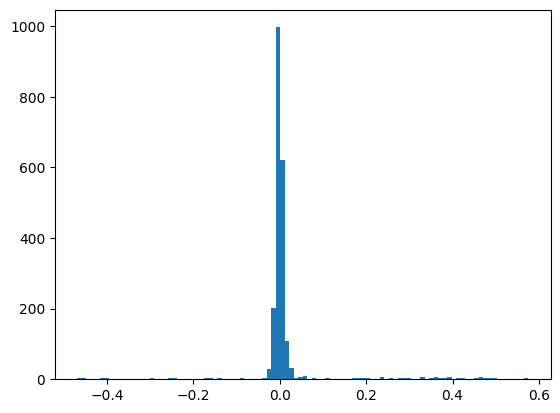

In [105]:
plt.hist(np.array(result)[:, -1], bins= 100)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   2.,   1.,   1.,   1.,   1.,   1.,   1.,   0.,   3.,
          5.,   5.,   8.,   3.,   3.,   3.,  11.,   8.,  11.,   9.,  15.,
         35.,  19.,  25.,  33.,  30.,  28.,  38.,  36.,  41.,  46.,  79.,
        133., 117., 184.,  73., 222., 136., 109.,  84.,  49.,  42.,  41.,
         69.,  26.,  26.,  24.,  15.,  18.,  19.,  11.,  11.,  13.,  14.,
          8.,   5.,   2.,   3.,   4.,   3.,   3.,   3.,   3.,   2.,   6.,
          3.,   2.,   3.,   3.,   0.,   2.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,   1.,   2.,
          1.]),
 array([-0.04419251, -0.04326572, -0.04233893, -0.04141213, -0.04048534,
        -0.03955855, -0.03863176, -0.03770496, -0.03677817, -0.03585138,
        -0.03492459, -0.0339978 , -0.033071  , -0.03214421, -0.03121742,
        -0.03029063, -0.02936384, -0.02843704, -0.02751025, -0.02658346,
        -0.02565667, -0.02

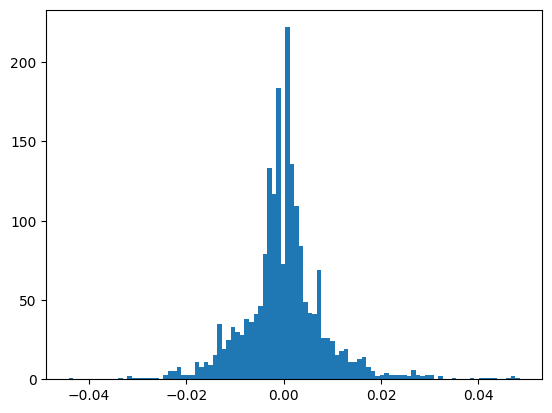

In [107]:
plt.hist([num for num in np.array(result)[:, -1] if -0.05 <= num <= 0.05], bins=100)

(array([479.,  19.,  10.,  25.,  21.,  22.,  10.,   2.,  14.,   1.,   6.,
          9.,  11.,   5.,   1.,   7.,   2.,   1.,   0.,   4.,   6.,   3.,
          5.,   1.,   1.,   1.,   2.,   2.,   2.,   1.,   1.,   1.,   1.,
          6.,   7.,   8.,   0.,   3.,   2.,   2.,   3.,   2.,   2.,   2.,
          0.,   0.,   3.,   0.,   7.,   1.,   1.,   1.,   5.,   4.,   0.,
          1.,   2.,   4.,   4.,   1.,   3.,   0.,   3.,   1.,   1.,   6.,
          5.,   3.,   0.,   2.,   2.,  16.,   1.,   0.,   2.,   1.,   3.,
          3.,   0.,   0.,   3.,   2.,   1.,   1.,   2.,   0.,   1.,   0.,
          0.,   0.,   2.,   0.,   0.,   1.,   9.,   2.,   1.,   0.,   0.,
          3.]),
 array([0.     , 0.00997, 0.01994, 0.02991, 0.03988, 0.04985, 0.05982,
        0.06979, 0.07976, 0.08973, 0.0997 , 0.10967, 0.11964, 0.12961,
        0.13958, 0.14955, 0.15952, 0.16949, 0.17946, 0.18943, 0.1994 ,
        0.20937, 0.21934, 0.22931, 0.23928, 0.24925, 0.25922, 0.26919,
        0.27916, 0.28913, 0.2991 ,

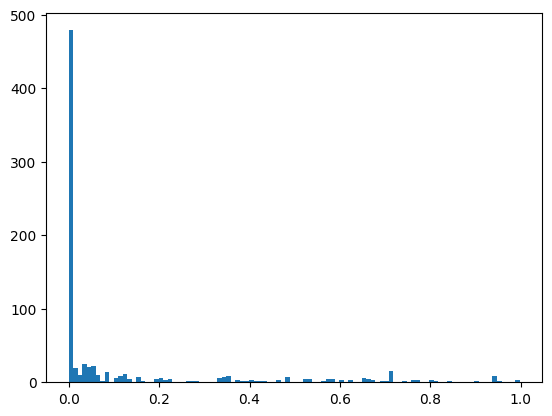

In [112]:
plt.hist([num for num in np.array(result)[:, 3] if num < 1], bins=100)